<a href="https://colab.research.google.com/github/TessRedie/Project_image_classification/blob/master/project_image_classification_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project  : Image Classification with the help of Deep Learning Algorithm

### References:

1. [Sleep stage classification from polysomnography (PSG) data](https://mne.tools/dev/auto_tutorials/clinical/60_sleep.html)

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### Data uploading

### Configuration

In [17]:
EPOCHS                  = 100   # Number of epocks
IMGSIZE                 = 96    # Image_size
BATCH_SIZE              = 32    #  For the processing per plot of image(for ptimizing the gradient descendant)
STOPPING_PATIENCE       = 10    # Callback for stopping id the model is not learning
VERBOSE                 = 0     # verbose level
MODEL_NAME              = 'cnn_80epochs_imgsize160'
OPTIMIZER               = 'adam'
TRAIN_MODEL             = True  # Model Training (True) or umploading (False)

In [15]:
from zipfile import ZipFile
file_name =  "/content/annotation_images.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


[How to upload folders to Google Colab?](https://stackoverflow.com/questions/56449262/how-to-upload-folders-to-google-colab)

In [18]:
batch_size = 32
img_height = 180
img_width = 180
train_ds = tf.keras.utils.image_dataset_from_directory( "/content/images_dogs",
                                           validation_split=0.2,
                                           subset="training",seed=123,
                                            image_size=(img_height, img_width)
                                            ,batch_size=batch_size)

Found 2301 files belonging to 13 classes.
Using 1841 files for training.


In [19]:
val_ds = tf.keras.utils.image_dataset_from_directory( "/content/images_dogs",
                                           validation_split=0.2,
                                           subset="validation",seed=123,
                                                     image_size=(img_height, img_width),
                                                     batch_size=batch_size)

Found 2301 files belonging to 13 classes.
Using 460 files for validation.


In [20]:
class_names = train_ds.class_names
print(class_names)

['Afghan_hound', 'African_hunting_dog', 'Bedlington_terrier', 'Eskimo_dog', 'Irish_terrier', 'Japanese_spaniel', 'Lakeland_terrier', 'Mexican_hairless', 'Norwegian_elkhound', 'Yorkshire_terrier', 'borzoi', 'papillon', 'redbone']


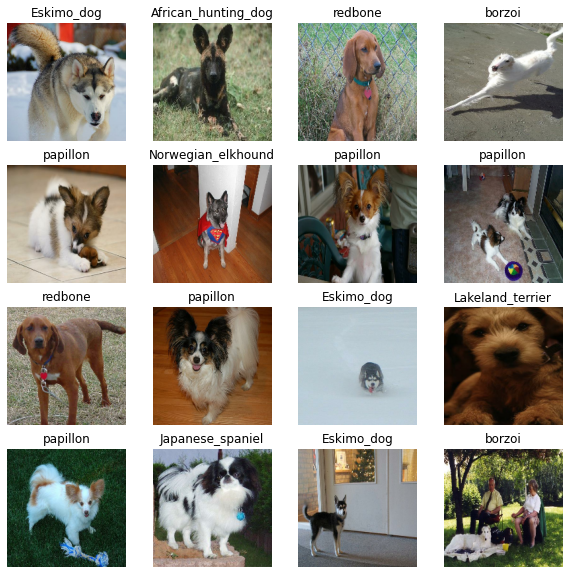

In [23]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Setting sleep manually

In [24]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
num_classes = 16

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  #tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [25]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
58/58 [==============================] - 67s 1s/step - loss: 2.7753 - accuracy: 0.0929 - val_loss: 2.5244 - val_accuracy: 0.1217
Epoch 2/10
58/58 [==============================] - 67s 1s/step - loss: 2.3872 - accuracy: 0.1972 - val_loss: 2.3629 - val_accuracy: 0.2043
Epoch 3/10
58/58 [==============================] - 66s 1s/step - loss: 1.9840 - accuracy: 0.3520 - val_loss: 2.3710 - val_accuracy: 0.2109
Epoch 4/10
58/58 [==============================] - 66s 1s/step - loss: 1.4003 - accuracy: 0.5611 - val_loss: 2.3384 - val_accuracy: 0.2674
Epoch 5/10
58/58 [==============================] - 67s 1s/step - loss: 0.7931 - accuracy: 0.7746 - val_loss: 2.8549 - val_accuracy: 0.2717
Epoch 6/10
58/58 [==============================] - 68s 1s/step - loss: 0.3751 - accuracy: 0.9055 - val_loss: 3.3440 - val_accuracy: 0.2543
Epoch 7/10
58/58 [==============================] - 67s 1s/step - loss: 0.1391 - accuracy: 0.9745 - val_loss: 3.9022 - val_accuracy: 0.2652
Epoch 8/10
58/58 [==

[VGG16 function](https://keras.io/api/applications/vgg/) 

In [26]:
from  keras.applications.vgg16 import VGG16
modelVGG16 = VGG16()

553476096/553467096 [==============================] - 3s 0us/step


In [34]:
import os
# TensorFlow and tf.kerasimport tensorflow as tf

import PIL.Image as Image
import os

import matplotlib.pylab

import keras
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image as img
from tensorflow.keras.utils import plot_model

from tensorflow import keras
from tensorflow.keras import Model

from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from IPython.core.display import Image


# Helper libraries
import numpy as np

print(tf.__version__)

2.8.0


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 59168)             0

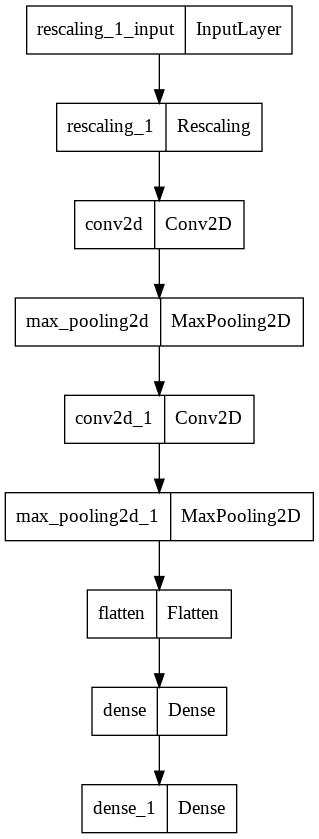

In [41]:
keras.utils.plot_model(model, "Project_Image_classification.png")

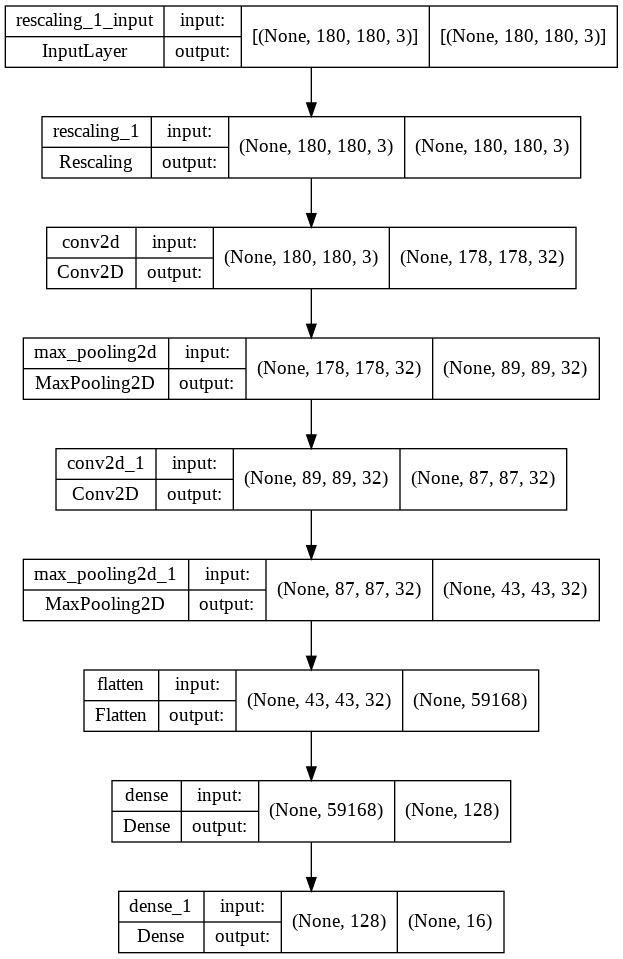

In [40]:
keras.utils.plot_model(model, "Project_Image_classification.png", show_shapes=True)